# Collaboration and Competition

---

## 1. Start the Environment

In [1]:
cd /Users/pengyuewang/deep-reinforcement-learning/python

/Users/pengyuewang/deep-reinforcement-learning/python


In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
cd /Users/pengyuewang/deep-reinforcement-learning/p3_collab-compet

/Users/pengyuewang/deep-reinforcement-learning/p3_collab-compet


In [4]:
from Agent_NN import Agent

In [5]:
env = UnityEnvironment(file_name="Tennis.app")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


## 2. Take Random Actions in the Environment

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

## 3. Train the agents

In [6]:
agent = Agent(state_size =24, action_size = 2, seed = 0)

In [7]:
def DDPG_epoch(n_episode = 1200):          
    score_list = []
    for i_episode in range(1, n_episode+1):
        print('-------------')
        print("episode",i_episode)
        print('-------------')
        agent.reset()
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations                  
        scores = np.zeros(num_agents)
        while True:
            
            action1 = agent.act(np.array(states[0]))[0]

            action2 = agent.act(np.array(states[1]))[0]

            actions = np.hstack((action1,action2))

        
            env_info = env.step(actions)[brain_name] 
            next_states = env_info.vector_observations

            rewards = env_info.rewards

            dones = env_info.local_done
            
            scores += rewards
            agent.step(states[0], action1, rewards[0], next_states[0], dones[0])
            agent.step(states[1], action2, rewards[1], next_states[1], dones[1])
            states = next_states
                
            if np.any(dones):                               
                break
                
        print('Score:',np.max(scores))
        score_list.append(np.max(scores))
        
        if np.max(scores) > 2:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_2.pth')

        
        
    torch.save(agent.actor_local.state_dict(), 'checkpoint.pth')
    print("Weights saved!")
    return score_list

In [8]:
score_list = DDPG_epoch(n_episode = 8000)

-------------
episode 1
-------------
Score: 0.0
-------------
episode 2
-------------
Score: 0.0
-------------
episode 3
-------------
Score: 0.0
-------------
episode 4
-------------
Score: 0.0
-------------
episode 5
-------------
Score: 0.0
-------------
episode 6
-------------
Score: 0.0
-------------
episode 7
-------------
Score: 0.0
-------------
episode 8
-------------
Score: 0.0
-------------
episode 9
-------------
Score: 0.0
-------------
episode 10
-------------
Score: 0.0
-------------
episode 11
-------------
Score: 0.0
-------------
episode 12
-------------
Score: 0.0
-------------
episode 13
-------------
Score: 0.0
-------------
episode 14
-------------
Score: 0.0
-------------
episode 15
-------------
Score: 0.0
-------------
episode 16
-------------
Score: 0.0
-------------
episode 17
-------------
Score: 0.0
-------------
episode 18
-------------
Score: 0.0
-------------
episode 19
-------------
Score: 0.0
-------------
episode 20
-------------
Score: 0.0
---------

Score: 0.0
-------------
episode 165
-------------
Score: 0.0
-------------
episode 166
-------------
Score: 0.0
-------------
episode 167
-------------
Score: 0.0
-------------
episode 168
-------------
Score: 0.0
-------------
episode 169
-------------
Score: 0.0
-------------
episode 170
-------------
Score: 0.0
-------------
episode 171
-------------
Score: 0.0
-------------
episode 172
-------------
Score: 0.0
-------------
episode 173
-------------
Score: 0.0
-------------
episode 174
-------------
Score: 0.0
-------------
episode 175
-------------
Score: 0.0
-------------
episode 176
-------------
Score: 0.0
-------------
episode 177
-------------
Score: 0.0
-------------
episode 178
-------------
Score: 0.0
-------------
episode 179
-------------
Score: 0.0
-------------
episode 180
-------------
Score: 0.0
-------------
episode 181
-------------
Score: 0.0
-------------
episode 182
-------------
Score: 0.0
-------------
episode 183
-------------
Score: 0.0
-------------
episod

Score: 0.0
-------------
episode 327
-------------
Score: 0.0
-------------
episode 328
-------------
Score: 0.0
-------------
episode 329
-------------
Score: 0.0
-------------
episode 330
-------------
Score: 0.0
-------------
episode 331
-------------
Score: 0.0
-------------
episode 332
-------------
Score: 0.0
-------------
episode 333
-------------
Score: 0.0
-------------
episode 334
-------------
Score: 0.0
-------------
episode 335
-------------
Score: 0.0
-------------
episode 336
-------------
Score: 0.0
-------------
episode 337
-------------
Score: 0.0
-------------
episode 338
-------------
Score: 0.0
-------------
episode 339
-------------
Score: 0.0
-------------
episode 340
-------------
Score: 0.0
-------------
episode 341
-------------
Score: 0.0
-------------
episode 342
-------------
Score: 0.0
-------------
episode 343
-------------
Score: 0.0
-------------
episode 344
-------------
Score: 0.0
-------------
episode 345
-------------
Score: 0.0
-------------
episod

Score: 0.0
-------------
episode 489
-------------
Score: 0.0
-------------
episode 490
-------------
Score: 0.0
-------------
episode 491
-------------
Score: 0.0
-------------
episode 492
-------------
Score: 0.0
-------------
episode 493
-------------
Score: 0.0
-------------
episode 494
-------------
Score: 0.0
-------------
episode 495
-------------
Score: 0.0
-------------
episode 496
-------------
Score: 0.0
-------------
episode 497
-------------
Score: 0.0
-------------
episode 498
-------------
Score: 0.0
-------------
episode 499
-------------
Score: 0.0
-------------
episode 500
-------------
Score: 0.0
-------------
episode 501
-------------
Score: 0.0
-------------
episode 502
-------------
Score: 0.0
-------------
episode 503
-------------
Score: 0.0
-------------
episode 504
-------------
Score: 0.0
-------------
episode 505
-------------
Score: 0.0
-------------
episode 506
-------------
Score: 0.0
-------------
episode 507
-------------
Score: 0.0
-------------
episod

Score: 0.0
-------------
episode 651
-------------
Score: 0.0
-------------
episode 652
-------------
Score: 0.0
-------------
episode 653
-------------
Score: 0.0
-------------
episode 654
-------------
Score: 0.0
-------------
episode 655
-------------
Score: 0.0
-------------
episode 656
-------------
Score: 0.0
-------------
episode 657
-------------
Score: 0.0
-------------
episode 658
-------------
Score: 0.0
-------------
episode 659
-------------
Score: 0.0
-------------
episode 660
-------------
Score: 0.0
-------------
episode 661
-------------
Score: 0.0
-------------
episode 662
-------------
Score: 0.0
-------------
episode 663
-------------
Score: 0.0
-------------
episode 664
-------------
Score: 0.0
-------------
episode 665
-------------
Score: 0.0
-------------
episode 666
-------------
Score: 0.0
-------------
episode 667
-------------
Score: 0.0
-------------
episode 668
-------------
Score: 0.0
-------------
episode 669
-------------
Score: 0.0
-------------
episod

Score: 0.0
-------------
episode 809
-------------
Score: 0.0
-------------
episode 810
-------------
Score: 0.0
-------------
episode 811
-------------
Score: 0.0
-------------
episode 812
-------------
Score: 0.0
-------------
episode 813
-------------
Score: 0.0
-------------
episode 814
-------------
Score: 0.09000000171363354
-------------
episode 815
-------------
Score: 0.0
-------------
episode 816
-------------
Score: 0.0
-------------
episode 817
-------------
Score: 0.0
-------------
episode 818
-------------
Score: 0.0
-------------
episode 819
-------------
Score: 0.0
-------------
episode 820
-------------
Score: 0.0
-------------
episode 821
-------------
Score: 0.0
-------------
episode 822
-------------
Score: 0.0
-------------
episode 823
-------------
Score: 0.0
-------------
episode 824
-------------
Score: 0.0
-------------
episode 825
-------------
Score: 0.0
-------------
episode 826
-------------
Score: 0.0
-------------
episode 827
-------------
Score: 0.0
----

Score: 0.0
-------------
episode 971
-------------
Score: 0.0
-------------
episode 972
-------------
Score: 0.0
-------------
episode 973
-------------
Score: 0.0
-------------
episode 974
-------------
Score: 0.0
-------------
episode 975
-------------
Score: 0.0
-------------
episode 976
-------------
Score: 0.0
-------------
episode 977
-------------
Score: 0.0
-------------
episode 978
-------------
Score: 0.0
-------------
episode 979
-------------
Score: 0.0
-------------
episode 980
-------------
Score: 0.0
-------------
episode 981
-------------
Score: 0.0
-------------
episode 982
-------------
Score: 0.0
-------------
episode 983
-------------
Score: 0.0
-------------
episode 984
-------------
Score: 0.0
-------------
episode 985
-------------
Score: 0.0
-------------
episode 986
-------------
Score: 0.0
-------------
episode 987
-------------
Score: 0.0
-------------
episode 988
-------------
Score: 0.0
-------------
episode 989
-------------
Score: 0.0
-------------
episod

Score: 0.0
-------------
episode 1130
-------------
Score: 0.0
-------------
episode 1131
-------------
Score: 0.0
-------------
episode 1132
-------------
Score: 0.0
-------------
episode 1133
-------------
Score: 0.0
-------------
episode 1134
-------------
Score: 0.0
-------------
episode 1135
-------------
Score: 0.0
-------------
episode 1136
-------------
Score: 0.0
-------------
episode 1137
-------------
Score: 0.0
-------------
episode 1138
-------------
Score: 0.0
-------------
episode 1139
-------------
Score: 0.0
-------------
episode 1140
-------------
Score: 0.0
-------------
episode 1141
-------------
Score: 0.0
-------------
episode 1142
-------------
Score: 0.0
-------------
episode 1143
-------------
Score: 0.0
-------------
episode 1144
-------------
Score: 0.0
-------------
episode 1145
-------------
Score: 0.0
-------------
episode 1146
-------------
Score: 0.0
-------------
episode 1147
-------------
Score: 0.0
-------------
episode 1148
-------------
Score: 0.0
-

Score: 0.0
-------------
episode 1288
-------------
Score: 0.0
-------------
episode 1289
-------------
Score: 0.0
-------------
episode 1290
-------------
Score: 0.0
-------------
episode 1291
-------------
Score: 0.0
-------------
episode 1292
-------------
Score: 0.0
-------------
episode 1293
-------------
Score: 0.0
-------------
episode 1294
-------------
Score: 0.0
-------------
episode 1295
-------------
Score: 0.0
-------------
episode 1296
-------------
Score: 0.0
-------------
episode 1297
-------------
Score: 0.0
-------------
episode 1298
-------------
Score: 0.0
-------------
episode 1299
-------------
Score: 0.0
-------------
episode 1300
-------------
Score: 0.0
-------------
episode 1301
-------------
Score: 0.0
-------------
episode 1302
-------------
Score: 0.0
-------------
episode 1303
-------------
Score: 0.0
-------------
episode 1304
-------------
Score: 0.0
-------------
episode 1305
-------------
Score: 0.0
-------------
episode 1306
-------------
Score: 0.0
-

Score: 0.0
-------------
episode 1447
-------------
Score: 0.0
-------------
episode 1448
-------------
Score: 0.0
-------------
episode 1449
-------------
Score: 0.0
-------------
episode 1450
-------------
Score: 0.0
-------------
episode 1451
-------------
Score: 0.0
-------------
episode 1452
-------------
Score: 0.0
-------------
episode 1453
-------------
Score: 0.0
-------------
episode 1454
-------------
Score: 0.0
-------------
episode 1455
-------------
Score: 0.0
-------------
episode 1456
-------------
Score: 0.0
-------------
episode 1457
-------------
Score: 0.0
-------------
episode 1458
-------------
Score: 0.0
-------------
episode 1459
-------------
Score: 0.0
-------------
episode 1460
-------------
Score: 0.0
-------------
episode 1461
-------------
Score: 0.0
-------------
episode 1462
-------------
Score: 0.0
-------------
episode 1463
-------------
Score: 0.0
-------------
episode 1464
-------------
Score: 0.0
-------------
episode 1465
-------------
Score: 0.0
-

Score: 0.0
-------------
episode 1606
-------------
Score: 0.0
-------------
episode 1607
-------------
Score: 0.0
-------------
episode 1608
-------------
Score: 0.0
-------------
episode 1609
-------------
Score: 0.0
-------------
episode 1610
-------------
Score: 0.0
-------------
episode 1611
-------------
Score: 0.0
-------------
episode 1612
-------------
Score: 0.0
-------------
episode 1613
-------------
Score: 0.0
-------------
episode 1614
-------------
Score: 0.0
-------------
episode 1615
-------------
Score: 0.0
-------------
episode 1616
-------------
Score: 0.0
-------------
episode 1617
-------------
Score: 0.0
-------------
episode 1618
-------------
Score: 0.0
-------------
episode 1619
-------------
Score: 0.0
-------------
episode 1620
-------------
Score: 0.0
-------------
episode 1621
-------------
Score: 0.0
-------------
episode 1622
-------------
Score: 0.0
-------------
episode 1623
-------------
Score: 0.0
-------------
episode 1624
-------------
Score: 0.0
-

Score: 0.0
-------------
episode 1763
-------------
Score: 0.0
-------------
episode 1764
-------------
Score: 0.0
-------------
episode 1765
-------------
Score: 0.0
-------------
episode 1766
-------------
Score: 0.0
-------------
episode 1767
-------------
Score: 0.0
-------------
episode 1768
-------------
Score: 0.0
-------------
episode 1769
-------------
Score: 0.0
-------------
episode 1770
-------------
Score: 0.0
-------------
episode 1771
-------------
Score: 0.0
-------------
episode 1772
-------------
Score: 0.0
-------------
episode 1773
-------------
Score: 0.0
-------------
episode 1774
-------------
Score: 0.0
-------------
episode 1775
-------------
Score: 0.0
-------------
episode 1776
-------------
Score: 0.0
-------------
episode 1777
-------------
Score: 0.0
-------------
episode 1778
-------------
Score: 0.0
-------------
episode 1779
-------------
Score: 0.0
-------------
episode 1780
-------------
Score: 0.0
-------------
episode 1781
-------------
Score: 0.0
-

Score: 0.0
-------------
episode 1921
-------------
Score: 0.0
-------------
episode 1922
-------------
Score: 0.0
-------------
episode 1923
-------------
Score: 0.0
-------------
episode 1924
-------------
Score: 0.0
-------------
episode 1925
-------------
Score: 0.0
-------------
episode 1926
-------------
Score: 0.0
-------------
episode 1927
-------------
Score: 0.0
-------------
episode 1928
-------------
Score: 0.0
-------------
episode 1929
-------------
Score: 0.0
-------------
episode 1930
-------------
Score: 0.0
-------------
episode 1931
-------------
Score: 0.0
-------------
episode 1932
-------------
Score: 0.0
-------------
episode 1933
-------------
Score: 0.0
-------------
episode 1934
-------------
Score: 0.0
-------------
episode 1935
-------------
Score: 0.0
-------------
episode 1936
-------------
Score: 0.0
-------------
episode 1937
-------------
Score: 0.0
-------------
episode 1938
-------------
Score: 0.0
-------------
episode 1939
-------------
Score: 0.0
-

Score: 0.0
-------------
episode 2079
-------------
Score: 0.0
-------------
episode 2080
-------------
Score: 0.0
-------------
episode 2081
-------------
Score: 0.0
-------------
episode 2082
-------------
Score: 0.0
-------------
episode 2083
-------------
Score: 0.0
-------------
episode 2084
-------------
Score: 0.0
-------------
episode 2085
-------------
Score: 0.0
-------------
episode 2086
-------------
Score: 0.0
-------------
episode 2087
-------------
Score: 0.0
-------------
episode 2088
-------------
Score: 0.0
-------------
episode 2089
-------------
Score: 0.0
-------------
episode 2090
-------------
Score: 0.0
-------------
episode 2091
-------------
Score: 0.0
-------------
episode 2092
-------------
Score: 0.0
-------------
episode 2093
-------------
Score: 0.0
-------------
episode 2094
-------------
Score: 0.0
-------------
episode 2095
-------------
Score: 0.0
-------------
episode 2096
-------------
Score: 0.0
-------------
episode 2097
-------------
Score: 0.0
-

Score: 0.0
-------------
episode 2225
-------------
Score: 0.0
-------------
episode 2226
-------------
Score: 0.0
-------------
episode 2227
-------------
Score: 0.0
-------------
episode 2228
-------------
Score: 0.0
-------------
episode 2229
-------------
Score: 0.0
-------------
episode 2230
-------------
Score: 0.09000000171363354
-------------
episode 2231
-------------
Score: 0.0
-------------
episode 2232
-------------
Score: 0.0
-------------
episode 2233
-------------
Score: 0.0
-------------
episode 2234
-------------
Score: 0.0
-------------
episode 2235
-------------
Score: 0.0
-------------
episode 2236
-------------
Score: 0.0
-------------
episode 2237
-------------
Score: 0.0
-------------
episode 2238
-------------
Score: 0.0
-------------
episode 2239
-------------
Score: 0.09000000171363354
-------------
episode 2240
-------------
Score: 0.0
-------------
episode 2241
-------------
Score: 0.0
-------------
episode 2242
-------------
Score: 0.0
-------------
episode

Score: 0.09000000171363354
-------------
episode 2367
-------------
Score: 0.09000000171363354
-------------
episode 2368
-------------
Score: 0.09000000171363354
-------------
episode 2369
-------------
Score: 0.10000000149011612
-------------
episode 2370
-------------
Score: 0.09000000171363354
-------------
episode 2371
-------------
Score: 0.09000000171363354
-------------
episode 2372
-------------
Score: 0.10000000149011612
-------------
episode 2373
-------------
Score: 0.09000000171363354
-------------
episode 2374
-------------
Score: 0.10000000149011612
-------------
episode 2375
-------------
Score: 0.10000000149011612
-------------
episode 2376
-------------
Score: 0.09000000171363354
-------------
episode 2377
-------------
Score: 0.10000000149011612
-------------
episode 2378
-------------
Score: 0.10000000149011612
-------------
episode 2379
-------------
Score: 0.0
-------------
episode 2380
-------------
Score: 0.09000000171363354
-------------
episode 2381
----------

Score: 0.09000000171363354
-------------
episode 2489
-------------
Score: 0.10000000149011612
-------------
episode 2490
-------------
Score: 0.09000000171363354
-------------
episode 2491
-------------
Score: 0.10000000149011612
-------------
episode 2492
-------------
Score: 0.09000000171363354
-------------
episode 2493
-------------
Score: 0.10000000149011612
-------------
episode 2494
-------------
Score: 0.10000000149011612
-------------
episode 2495
-------------
Score: 0.09000000171363354
-------------
episode 2496
-------------
Score: 0.10000000149011612
-------------
episode 2497
-------------
Score: 0.09000000171363354
-------------
episode 2498
-------------
Score: 0.09000000171363354
-------------
episode 2499
-------------
Score: 0.09000000171363354
-------------
episode 2500
-------------
Score: 0.10000000149011612
-------------
episode 2501
-------------
Score: 0.09000000171363354
-------------
episode 2502
-------------
Score: 0.10000000149011612
-------------
episode

Score: 0.10000000149011612
-------------
episode 2610
-------------
Score: 0.09000000171363354
-------------
episode 2611
-------------
Score: 0.09000000171363354
-------------
episode 2612
-------------
Score: 0.10000000149011612
-------------
episode 2613
-------------
Score: 0.09000000171363354
-------------
episode 2614
-------------
Score: 0.10000000149011612
-------------
episode 2615
-------------
Score: 0.10000000149011612
-------------
episode 2616
-------------
Score: 0.09000000171363354
-------------
episode 2617
-------------
Score: 0.10000000149011612
-------------
episode 2618
-------------
Score: 0.10000000149011612
-------------
episode 2619
-------------
Score: 0.09000000171363354
-------------
episode 2620
-------------
Score: 0.09000000171363354
-------------
episode 2621
-------------
Score: 0.09000000171363354
-------------
episode 2622
-------------
Score: 0.09000000171363354
-------------
episode 2623
-------------
Score: 0.10000000149011612
-------------
episode

Score: 0.09000000171363354
-------------
episode 2732
-------------
Score: 0.10000000149011612
-------------
episode 2733
-------------
Score: 0.10000000149011612
-------------
episode 2734
-------------
Score: 0.10000000149011612
-------------
episode 2735
-------------
Score: 0.09000000171363354
-------------
episode 2736
-------------
Score: 0.09000000171363354
-------------
episode 2737
-------------
Score: 0.09000000171363354
-------------
episode 2738
-------------
Score: 0.09000000171363354
-------------
episode 2739
-------------
Score: 0.0
-------------
episode 2740
-------------
Score: 0.10000000149011612
-------------
episode 2741
-------------
Score: 0.09000000171363354
-------------
episode 2742
-------------
Score: 0.10000000149011612
-------------
episode 2743
-------------
Score: 0.09000000171363354
-------------
episode 2744
-------------
Score: 0.10000000149011612
-------------
episode 2745
-------------
Score: 0.09000000171363354
-------------
episode 2746
----------

Score: 0.10000000149011612
-------------
episode 2853
-------------
Score: 0.09000000171363354
-------------
episode 2854
-------------
Score: 0.10000000149011612
-------------
episode 2855
-------------
Score: 0.09000000171363354
-------------
episode 2856
-------------
Score: 0.09000000171363354
-------------
episode 2857
-------------
Score: 0.10000000149011612
-------------
episode 2858
-------------
Score: 0.09000000171363354
-------------
episode 2859
-------------
Score: 0.09000000171363354
-------------
episode 2860
-------------
Score: 0.09000000171363354
-------------
episode 2861
-------------
Score: 0.10000000149011612
-------------
episode 2862
-------------
Score: 0.09000000171363354
-------------
episode 2863
-------------
Score: 0.09000000171363354
-------------
episode 2864
-------------
Score: 0.10000000149011612
-------------
episode 2865
-------------
Score: 0.09000000171363354
-------------
episode 2866
-------------
Score: 0.09000000171363354
-------------
episode

Score: 0.09000000171363354
-------------
episode 2974
-------------
Score: 0.0
-------------
episode 2975
-------------
Score: 0.0
-------------
episode 2976
-------------
Score: 0.09000000171363354
-------------
episode 2977
-------------
Score: 0.0
-------------
episode 2978
-------------
Score: 0.0
-------------
episode 2979
-------------
Score: 0.0
-------------
episode 2980
-------------
Score: 0.0
-------------
episode 2981
-------------
Score: 0.0
-------------
episode 2982
-------------
Score: 0.10000000149011612
-------------
episode 2983
-------------
Score: 0.0
-------------
episode 2984
-------------
Score: 0.0
-------------
episode 2985
-------------
Score: 0.0
-------------
episode 2986
-------------
Score: 0.0
-------------
episode 2987
-------------
Score: 0.0
-------------
episode 2988
-------------
Score: 0.0
-------------
episode 2989
-------------
Score: 0.0
-------------
episode 2990
-------------
Score: 0.0
-------------
episode 2991
-------------
Score: 0.0
-----

Score: 0.09000000171363354
-------------
episode 3103
-------------
Score: 0.10000000149011612
-------------
episode 3104
-------------
Score: 0.10000000149011612
-------------
episode 3105
-------------
Score: 0.09000000171363354
-------------
episode 3106
-------------
Score: 0.10000000149011612
-------------
episode 3107
-------------
Score: 0.10000000149011612
-------------
episode 3108
-------------
Score: 0.10000000149011612
-------------
episode 3109
-------------
Score: 0.09000000171363354
-------------
episode 3110
-------------
Score: 0.10000000149011612
-------------
episode 3111
-------------
Score: 0.09000000171363354
-------------
episode 3112
-------------
Score: 0.09000000171363354
-------------
episode 3113
-------------
Score: 0.09000000171363354
-------------
episode 3114
-------------
Score: 0.10000000149011612
-------------
episode 3115
-------------
Score: 0.10000000149011612
-------------
episode 3116
-------------
Score: 0.10000000149011612
-------------
episode

Score: 0.10000000149011612
-------------
episode 3224
-------------
Score: 0.20000000298023224
-------------
episode 3225
-------------
Score: 0.10000000149011612
-------------
episode 3226
-------------
Score: 0.09000000171363354
-------------
episode 3227
-------------
Score: 0.09000000171363354
-------------
episode 3228
-------------
Score: 0.10000000149011612
-------------
episode 3229
-------------
Score: 0.09000000171363354
-------------
episode 3230
-------------
Score: 0.10000000149011612
-------------
episode 3231
-------------
Score: 0.09000000171363354
-------------
episode 3232
-------------
Score: 0.10000000149011612
-------------
episode 3233
-------------
Score: 0.09000000171363354
-------------
episode 3234
-------------
Score: 0.09000000171363354
-------------
episode 3235
-------------
Score: 0.10000000149011612
-------------
episode 3236
-------------
Score: 0.09000000171363354
-------------
episode 3237
-------------
Score: 0.10000000149011612
-------------
episode

Score: 0.10000000149011612
-------------
episode 3347
-------------
Score: 0.09000000171363354
-------------
episode 3348
-------------
Score: 0.10000000149011612
-------------
episode 3349
-------------
Score: 0.09000000171363354
-------------
episode 3350
-------------
Score: 0.10000000149011612
-------------
episode 3351
-------------
Score: 0.10000000149011612
-------------
episode 3352
-------------
Score: 0.09000000171363354
-------------
episode 3353
-------------
Score: 0.09000000171363354
-------------
episode 3354
-------------
Score: 0.10000000149011612
-------------
episode 3355
-------------
Score: 0.10000000149011612
-------------
episode 3356
-------------
Score: 0.10000000149011612
-------------
episode 3357
-------------
Score: 0.10000000149011612
-------------
episode 3358
-------------
Score: 0.10000000149011612
-------------
episode 3359
-------------
Score: 0.09000000171363354
-------------
episode 3360
-------------
Score: 0.09000000171363354
-------------
episode

Score: 0.0
-------------
episode 3473
-------------
Score: 0.09000000171363354
-------------
episode 3474
-------------
Score: 0.10000000149011612
-------------
episode 3475
-------------
Score: 0.0
-------------
episode 3476
-------------
Score: 0.10000000149011612
-------------
episode 3477
-------------
Score: 0.09000000171363354
-------------
episode 3478
-------------
Score: 0.10000000149011612
-------------
episode 3479
-------------
Score: 0.0
-------------
episode 3480
-------------
Score: 0.10000000149011612
-------------
episode 3481
-------------
Score: 0.10000000149011612
-------------
episode 3482
-------------
Score: 0.10000000149011612
-------------
episode 3483
-------------
Score: 0.10000000149011612
-------------
episode 3484
-------------
Score: 0.10000000149011612
-------------
episode 3485
-------------
Score: 0.10000000149011612
-------------
episode 3486
-------------
Score: 0.10000000149011612
-------------
episode 3487
-------------
Score: 0.10000000149011612
-

Score: 0.10000000149011612
-------------
episode 3595
-------------
Score: 0.10000000149011612
-------------
episode 3596
-------------
Score: 0.10000000149011612
-------------
episode 3597
-------------
Score: 0.10000000149011612
-------------
episode 3598
-------------
Score: 0.10000000149011612
-------------
episode 3599
-------------
Score: 0.09000000171363354
-------------
episode 3600
-------------
Score: 0.10000000149011612
-------------
episode 3601
-------------
Score: 0.09000000171363354
-------------
episode 3602
-------------
Score: 0.09000000171363354
-------------
episode 3603
-------------
Score: 0.10000000149011612
-------------
episode 3604
-------------
Score: 0.10000000149011612
-------------
episode 3605
-------------
Score: 0.09000000171363354
-------------
episode 3606
-------------
Score: 0.09000000171363354
-------------
episode 3607
-------------
Score: 0.09000000171363354
-------------
episode 3608
-------------
Score: 0.10000000149011612
-------------
episode

Score: 0.10000000149011612
-------------
episode 3716
-------------
Score: 0.10000000149011612
-------------
episode 3717
-------------
Score: 0.10000000149011612
-------------
episode 3718
-------------
Score: 0.09000000171363354
-------------
episode 3719
-------------
Score: 0.10000000149011612
-------------
episode 3720
-------------
Score: 0.09000000171363354
-------------
episode 3721
-------------
Score: 0.09000000171363354
-------------
episode 3722
-------------
Score: 0.09000000171363354
-------------
episode 3723
-------------
Score: 0.09000000171363354
-------------
episode 3724
-------------
Score: 0.09000000171363354
-------------
episode 3725
-------------
Score: 0.09000000171363354
-------------
episode 3726
-------------
Score: 0.09000000171363354
-------------
episode 3727
-------------
Score: 0.10000000149011612
-------------
episode 3728
-------------
Score: 0.10000000149011612
-------------
episode 3729
-------------
Score: 0.09000000171363354
-------------
episode

Score: 0.20000000298023224
-------------
episode 3837
-------------
Score: 0.10000000149011612
-------------
episode 3838
-------------
Score: 0.10000000149011612
-------------
episode 3839
-------------
Score: 0.10000000149011612
-------------
episode 3840
-------------
Score: 0.10000000149011612
-------------
episode 3841
-------------
Score: 0.10000000149011612
-------------
episode 3842
-------------
Score: 0.10000000149011612
-------------
episode 3843
-------------
Score: 0.10000000149011612
-------------
episode 3844
-------------
Score: 0.10000000149011612
-------------
episode 3845
-------------
Score: 0.10000000149011612
-------------
episode 3846
-------------
Score: 0.10000000149011612
-------------
episode 3847
-------------
Score: 0.10000000149011612
-------------
episode 3848
-------------
Score: 0.10000000149011612
-------------
episode 3849
-------------
Score: 0.10000000149011612
-------------
episode 3850
-------------
Score: 0.10000000149011612
-------------
episode

Score: 0.19000000320374966
-------------
episode 3959
-------------
Score: 0.10000000149011612
-------------
episode 3960
-------------
Score: 0.10000000149011612
-------------
episode 3961
-------------
Score: 0.10000000149011612
-------------
episode 3962
-------------
Score: 0.09000000171363354
-------------
episode 3963
-------------
Score: 0.09000000171363354
-------------
episode 3964
-------------
Score: 0.09000000171363354
-------------
episode 3965
-------------
Score: 0.10000000149011612
-------------
episode 3966
-------------
Score: 0.10000000149011612
-------------
episode 3967
-------------
Score: 0.10000000149011612
-------------
episode 3968
-------------
Score: 0.10000000149011612
-------------
episode 3969
-------------
Score: 0.10000000149011612
-------------
episode 3970
-------------
Score: 0.09000000171363354
-------------
episode 3971
-------------
Score: 0.10000000149011612
-------------
episode 3972
-------------
Score: 0.10000000149011612
-------------
episode

Score: 0.10000000149011612
-------------
episode 4080
-------------
Score: 0.10000000149011612
-------------
episode 4081
-------------
Score: 0.09000000171363354
-------------
episode 4082
-------------
Score: 0.10000000149011612
-------------
episode 4083
-------------
Score: 0.09000000171363354
-------------
episode 4084
-------------
Score: 0.10000000149011612
-------------
episode 4085
-------------
Score: 0.20000000298023224
-------------
episode 4086
-------------
Score: 0.10000000149011612
-------------
episode 4087
-------------
Score: 0.10000000149011612
-------------
episode 4088
-------------
Score: 0.09000000171363354
-------------
episode 4089
-------------
Score: 0.20000000298023224
-------------
episode 4090
-------------
Score: 0.09000000171363354
-------------
episode 4091
-------------
Score: 0.0
-------------
episode 4092
-------------
Score: 0.0
-------------
episode 4093
-------------
Score: 0.09000000171363354
-------------
episode 4094
-------------
Score: 0.100

Score: 0.10000000149011612
-------------
episode 4202
-------------
Score: 0.10000000149011612
-------------
episode 4203
-------------
Score: 0.10000000149011612
-------------
episode 4204
-------------
Score: 0.09000000171363354
-------------
episode 4205
-------------
Score: 0.10000000149011612
-------------
episode 4206
-------------
Score: 0.09000000171363354
-------------
episode 4207
-------------
Score: 0.10000000149011612
-------------
episode 4208
-------------
Score: 0.0
-------------
episode 4209
-------------
Score: 0.09000000171363354
-------------
episode 4210
-------------
Score: 0.09000000171363354
-------------
episode 4211
-------------
Score: 0.09000000171363354
-------------
episode 4212
-------------
Score: 0.10000000149011612
-------------
episode 4213
-------------
Score: 0.10000000149011612
-------------
episode 4214
-------------
Score: 0.10000000149011612
-------------
episode 4215
-------------
Score: 0.10000000149011612
-------------
episode 4216
----------

Score: 0.09000000171363354
-------------
episode 4326
-------------
Score: 0.10000000149011612
-------------
episode 4327
-------------
Score: 0.10000000149011612
-------------
episode 4328
-------------
Score: 0.10000000149011612
-------------
episode 4329
-------------
Score: 0.10000000149011612
-------------
episode 4330
-------------
Score: 0.10000000149011612
-------------
episode 4331
-------------
Score: 0.10000000149011612
-------------
episode 4332
-------------
Score: 0.10000000149011612
-------------
episode 4333
-------------
Score: 0.10000000149011612
-------------
episode 4334
-------------
Score: 0.10000000149011612
-------------
episode 4335
-------------
Score: 0.10000000149011612
-------------
episode 4336
-------------
Score: 0.20000000298023224
-------------
episode 4337
-------------
Score: 0.10000000149011612
-------------
episode 4338
-------------
Score: 0.19000000320374966
-------------
episode 4339
-------------
Score: 0.10000000149011612
-------------
episode

Score: 0.10000000149011612
-------------
episode 4448
-------------
Score: 0.19000000320374966
-------------
episode 4449
-------------
Score: 0.10000000149011612
-------------
episode 4450
-------------
Score: 0.10000000149011612
-------------
episode 4451
-------------
Score: 0.10000000149011612
-------------
episode 4452
-------------
Score: 0.10000000149011612
-------------
episode 4453
-------------
Score: 0.10000000149011612
-------------
episode 4454
-------------
Score: 0.30000000447034836
-------------
episode 4455
-------------
Score: 0.10000000149011612
-------------
episode 4456
-------------
Score: 0.10000000149011612
-------------
episode 4457
-------------
Score: 0.10000000149011612
-------------
episode 4458
-------------
Score: 0.10000000149011612
-------------
episode 4459
-------------
Score: 0.10000000149011612
-------------
episode 4460
-------------
Score: 0.10000000149011612
-------------
episode 4461
-------------
Score: 0.0
-------------
episode 4462
----------

Score: 0.10000000149011612
-------------
episode 4574
-------------
Score: 0.10000000149011612
-------------
episode 4575
-------------
Score: 0.09000000171363354
-------------
episode 4576
-------------
Score: 0.10000000149011612
-------------
episode 4577
-------------
Score: 0.10000000149011612
-------------
episode 4578
-------------
Score: 0.10000000149011612
-------------
episode 4579
-------------
Score: 0.10000000149011612
-------------
episode 4580
-------------
Score: 0.09000000171363354
-------------
episode 4581
-------------
Score: 0.10000000149011612
-------------
episode 4582
-------------
Score: 0.10000000149011612
-------------
episode 4583
-------------
Score: 0.19000000320374966
-------------
episode 4584
-------------
Score: 0.09000000171363354
-------------
episode 4585
-------------
Score: 0.10000000149011612
-------------
episode 4586
-------------
Score: 0.0
-------------
episode 4587
-------------
Score: 0.10000000149011612
-------------
episode 4588
----------

Score: 0.09000000171363354
-------------
episode 4696
-------------
Score: 0.10000000149011612
-------------
episode 4697
-------------
Score: 0.09000000171363354
-------------
episode 4698
-------------
Score: 0.09000000171363354
-------------
episode 4699
-------------
Score: 0.10000000149011612
-------------
episode 4700
-------------
Score: 0.09000000171363354
-------------
episode 4701
-------------
Score: 0.10000000149011612
-------------
episode 4702
-------------
Score: 0.09000000171363354
-------------
episode 4703
-------------
Score: 0.10000000149011612
-------------
episode 4704
-------------
Score: 0.10000000149011612
-------------
episode 4705
-------------
Score: 0.10000000149011612
-------------
episode 4706
-------------
Score: 0.10000000149011612
-------------
episode 4707
-------------
Score: 0.09000000171363354
-------------
episode 4708
-------------
Score: 0.10000000149011612
-------------
episode 4709
-------------
Score: 0.10000000149011612
-------------
episode

Score: 0.10000000149011612
-------------
episode 4819
-------------
Score: 0.10000000149011612
-------------
episode 4820
-------------
Score: 0.10000000149011612
-------------
episode 4821
-------------
Score: 0.10000000149011612
-------------
episode 4822
-------------
Score: 0.0
-------------
episode 4823
-------------
Score: 0.10000000149011612
-------------
episode 4824
-------------
Score: 0.10000000149011612
-------------
episode 4825
-------------
Score: 0.10000000149011612
-------------
episode 4826
-------------
Score: 0.10000000149011612
-------------
episode 4827
-------------
Score: 0.10000000149011612
-------------
episode 4828
-------------
Score: 0.09000000171363354
-------------
episode 4829
-------------
Score: 0.10000000149011612
-------------
episode 4830
-------------
Score: 0.10000000149011612
-------------
episode 4831
-------------
Score: 0.09000000171363354
-------------
episode 4832
-------------
Score: 0.10000000149011612
-------------
episode 4833
----------

Score: 0.09000000171363354
-------------
episode 4941
-------------
Score: 0.10000000149011612
-------------
episode 4942
-------------
Score: 0.10000000149011612
-------------
episode 4943
-------------
Score: 0.19000000320374966
-------------
episode 4944
-------------
Score: 0.09000000171363354
-------------
episode 4945
-------------
Score: 0.0
-------------
episode 4946
-------------
Score: 0.10000000149011612
-------------
episode 4947
-------------
Score: 0.1900000050663948
-------------
episode 4948
-------------
Score: 0.10000000149011612
-------------
episode 4949
-------------
Score: 0.10000000149011612
-------------
episode 4950
-------------
Score: 0.0
-------------
episode 4951
-------------
Score: 0.4000000059604645
-------------
episode 4952
-------------
Score: 0.10000000149011612
-------------
episode 4953
-------------
Score: 0.10000000149011612
-------------
episode 4954
-------------
Score: 0.10000000149011612
-------------
episode 4955
-------------
Score: 0.10000

Score: 0.10000000149011612
-------------
episode 5064
-------------
Score: 1.2000000178813934
-------------
episode 5065
-------------
Score: 1.0000000149011612
-------------
episode 5066
-------------
Score: 0.5000000074505806
-------------
episode 5067
-------------
Score: 1.0000000149011612
-------------
episode 5068
-------------
Score: 0.9000000134110451
-------------
episode 5069
-------------
Score: 0.800000011920929
-------------
episode 5070
-------------
Score: 0.10000000149011612
-------------
episode 5071
-------------
Score: 0.30000000447034836
-------------
episode 5072
-------------
Score: 0.10000000149011612
-------------
episode 5073
-------------
Score: 1.4000000208616257
-------------
episode 5074
-------------
Score: 0.0
-------------
episode 5075
-------------
Score: 0.800000011920929
-------------
episode 5076
-------------
Score: 2.3000000342726707
-------------
episode 5077
-------------
Score: 0.20000000298023224
-------------
episode 5078
-------------
Score: 

Score: 0.5000000074505806
-------------
episode 5188
-------------
Score: 0.6000000089406967
-------------
episode 5189
-------------
Score: 0.10000000149011612
-------------
episode 5190
-------------
Score: 0.10000000149011612
-------------
episode 5191
-------------
Score: 0.10000000149011612
-------------
episode 5192
-------------
Score: 0.10000000149011612
-------------
episode 5193
-------------
Score: 0.20000000298023224
-------------
episode 5194
-------------
Score: 0.10000000149011612
-------------
episode 5195
-------------
Score: 0.5000000074505806
-------------
episode 5196
-------------
Score: 0.19000000320374966
-------------
episode 5197
-------------
Score: 0.5000000074505806
-------------
episode 5198
-------------
Score: 0.0
-------------
episode 5199
-------------
Score: 0.10000000149011612
-------------
episode 5200
-------------
Score: 0.9000000134110451
-------------
episode 5201
-------------
Score: 0.6000000089406967
-------------
episode 5202
-------------
Sc

Score: 0.20000000298023224
-------------
episode 5310
-------------
Score: 0.10000000149011612
-------------
episode 5311
-------------
Score: 0.10000000149011612
-------------
episode 5312
-------------
Score: 0.10000000149011612
-------------
episode 5313
-------------
Score: 0.10000000149011612
-------------
episode 5314
-------------
Score: 0.10000000149011612
-------------
episode 5315
-------------
Score: 0.20000000298023224
-------------
episode 5316
-------------
Score: 0.20000000298023224
-------------
episode 5317
-------------
Score: 0.20000000298023224
-------------
episode 5318
-------------
Score: 0.10000000149011612
-------------
episode 5319
-------------
Score: 0.10000000149011612
-------------
episode 5320
-------------
Score: 0.10000000149011612
-------------
episode 5321
-------------
Score: 0.10000000149011612
-------------
episode 5322
-------------
Score: 0.09000000171363354
-------------
episode 5323
-------------
Score: 0.10000000149011612
-------------
episode

Score: 0.20000000298023224
-------------
episode 5431
-------------
Score: 0.10000000149011612
-------------
episode 5432
-------------
Score: 0.09000000171363354
-------------
episode 5433
-------------
Score: 0.09000000171363354
-------------
episode 5434
-------------
Score: 0.09000000171363354
-------------
episode 5435
-------------
Score: 0.10000000149011612
-------------
episode 5436
-------------
Score: 0.10000000149011612
-------------
episode 5437
-------------
Score: 0.10000000149011612
-------------
episode 5438
-------------
Score: 0.10000000149011612
-------------
episode 5439
-------------
Score: 0.20000000298023224
-------------
episode 5440
-------------
Score: 0.10000000149011612
-------------
episode 5441
-------------
Score: 0.10000000149011612
-------------
episode 5442
-------------
Score: 0.19000000320374966
-------------
episode 5443
-------------
Score: 0.10000000149011612
-------------
episode 5444
-------------
Score: 0.10000000149011612
-------------
episode

Score: 0.2900000046938658
-------------
episode 5552
-------------
Score: 0.10000000149011612
-------------
episode 5553
-------------
Score: 0.09000000171363354
-------------
episode 5554
-------------
Score: 0.10000000149011612
-------------
episode 5555
-------------
Score: 0.20000000298023224
-------------
episode 5556
-------------
Score: 0.10000000149011612
-------------
episode 5557
-------------
Score: 0.2900000046938658
-------------
episode 5558
-------------
Score: 0.20000000298023224
-------------
episode 5559
-------------
Score: 0.30000000447034836
-------------
episode 5560
-------------
Score: 0.20000000298023224
-------------
episode 5561
-------------
Score: 0.10000000149011612
-------------
episode 5562
-------------
Score: 0.10000000149011612
-------------
episode 5563
-------------
Score: 0.10000000149011612
-------------
episode 5564
-------------
Score: 0.20000000298023224
-------------
episode 5565
-------------
Score: 0.20000000298023224
-------------
episode 5

Score: 0.10000000149011612
-------------
episode 5674
-------------
Score: 0.800000011920929
-------------
episode 5675
-------------
Score: 0.4000000059604645
-------------
episode 5676
-------------
Score: 0.20000000298023224
-------------
episode 5677
-------------
Score: 0.10000000149011612
-------------
episode 5678
-------------
Score: 0.4000000059604645
-------------
episode 5679
-------------
Score: 0.10000000149011612
-------------
episode 5680
-------------
Score: 0.30000000447034836
-------------
episode 5681
-------------
Score: 0.10000000149011612
-------------
episode 5682
-------------
Score: 0.10000000149011612
-------------
episode 5683
-------------
Score: 0.10000000149011612
-------------
episode 5684
-------------
Score: 0.4000000059604645
-------------
episode 5685
-------------
Score: 0.10000000149011612
-------------
episode 5686
-------------
Score: 0.10000000149011612
-------------
episode 5687
-------------
Score: 0.20000000298023224
-------------
episode 5688

Score: 0.30000000447034836
-------------
episode 5796
-------------
Score: 0.19000000320374966
-------------
episode 5797
-------------
Score: 0.30000000447034836
-------------
episode 5798
-------------
Score: 0.3900000061839819
-------------
episode 5799
-------------
Score: 0.20000000298023224
-------------
episode 5800
-------------
Score: 0.09000000171363354
-------------
episode 5801
-------------
Score: 0.10000000149011612
-------------
episode 5802
-------------
Score: 0.20000000298023224
-------------
episode 5803
-------------
Score: 0.10000000149011612
-------------
episode 5804
-------------
Score: 0.10000000149011612
-------------
episode 5805
-------------
Score: 0.10000000149011612
-------------
episode 5806
-------------
Score: 0.20000000298023224
-------------
episode 5807
-------------
Score: 0.20000000298023224
-------------
episode 5808
-------------
Score: 0.09000000171363354
-------------
episode 5809
-------------
Score: 0.20000000298023224
-------------
episode 

Score: 0.10000000149011612
-------------
episode 5917
-------------
Score: 0.0
-------------
episode 5918
-------------
Score: 0.10000000149011612
-------------
episode 5919
-------------
Score: 0.10000000149011612
-------------
episode 5920
-------------
Score: 0.10000000149011612
-------------
episode 5921
-------------
Score: 0.30000000447034836
-------------
episode 5922
-------------
Score: 0.20000000298023224
-------------
episode 5923
-------------
Score: 0.10000000149011612
-------------
episode 5924
-------------
Score: 0.30000000447034836
-------------
episode 5925
-------------
Score: 0.10000000149011612
-------------
episode 5926
-------------
Score: 0.10000000149011612
-------------
episode 5927
-------------
Score: 0.10000000149011612
-------------
episode 5928
-------------
Score: 0.30000000447034836
-------------
episode 5929
-------------
Score: 0.10000000149011612
-------------
episode 5930
-------------
Score: 0.20000000298023224
-------------
episode 5931
----------

Score: 0.30000000447034836
-------------
episode 6040
-------------
Score: 0.0
-------------
episode 6041
-------------
Score: 0.20000000298023224
-------------
episode 6042
-------------
Score: 0.10000000149011612
-------------
episode 6043
-------------
Score: 0.09000000171363354
-------------
episode 6044
-------------
Score: 0.20000000298023224
-------------
episode 6045
-------------
Score: 0.10000000149011612
-------------
episode 6046
-------------
Score: 0.20000000298023224
-------------
episode 6047
-------------
Score: 0.5000000074505806
-------------
episode 6048
-------------
Score: 0.10000000149011612
-------------
episode 6049
-------------
Score: 0.30000000447034836
-------------
episode 6050
-------------
Score: 0.10000000149011612
-------------
episode 6051
-------------
Score: 0.10000000149011612
-------------
episode 6052
-------------
Score: 0.4000000059604645
-------------
episode 6053
-------------
Score: 0.09000000171363354
-------------
episode 6054
------------

Score: 0.10000000149011612
-------------
episode 6163
-------------
Score: 0.10000000149011612
-------------
episode 6164
-------------
Score: 0.20000000298023224
-------------
episode 6165
-------------
Score: 0.10000000149011612
-------------
episode 6166
-------------
Score: 0.10000000149011612
-------------
episode 6167
-------------
Score: 0.10000000149011612
-------------
episode 6168
-------------
Score: 0.19000000320374966
-------------
episode 6169
-------------
Score: 0.20000000298023224
-------------
episode 6170
-------------
Score: 0.10000000149011612
-------------
episode 6171
-------------
Score: 0.20000000298023224
-------------
episode 6172
-------------
Score: 0.20000000298023224
-------------
episode 6173
-------------
Score: 0.10000000149011612
-------------
episode 6174
-------------
Score: 0.10000000149011612
-------------
episode 6175
-------------
Score: 0.30000000447034836
-------------
episode 6176
-------------
Score: 0.10000000149011612
-------------
episode

Score: 0.10000000149011612
-------------
episode 6285
-------------
Score: 0.2900000046938658
-------------
episode 6286
-------------
Score: 0.30000000447034836
-------------
episode 6287
-------------
Score: 0.10000000149011612
-------------
episode 6288
-------------
Score: 0.10000000149011612
-------------
episode 6289
-------------
Score: 0.10000000149011612
-------------
episode 6290
-------------
Score: 0.10000000149011612
-------------
episode 6291
-------------
Score: 0.09000000171363354
-------------
episode 6292
-------------
Score: 0.10000000149011612
-------------
episode 6293
-------------
Score: 0.4000000059604645
-------------
episode 6294
-------------
Score: 0.10000000149011612
-------------
episode 6295
-------------
Score: 0.20000000298023224
-------------
episode 6296
-------------
Score: 0.10000000149011612
-------------
episode 6297
-------------
Score: 0.10000000149011612
-------------
episode 6298
-------------
Score: 0.10000000149011612
-------------
episode 6

Score: 0.4000000059604645
-------------
episode 6408
-------------
Score: 0.30000000447034836
-------------
episode 6409
-------------
Score: 0.10000000149011612
-------------
episode 6410
-------------
Score: 0.20000000298023224
-------------
episode 6411
-------------
Score: 0.10000000149011612
-------------
episode 6412
-------------
Score: 0.10000000149011612
-------------
episode 6413
-------------
Score: 0.0
-------------
episode 6414
-------------
Score: 0.10000000149011612
-------------
episode 6415
-------------
Score: 0.0
-------------
episode 6416
-------------
Score: 0.10000000149011612
-------------
episode 6417
-------------
Score: 0.09000000171363354
-------------
episode 6418
-------------
Score: 0.10000000149011612
-------------
episode 6419
-------------
Score: 0.30000000447034836
-------------
episode 6420
-------------
Score: 0.20000000298023224
-------------
episode 6421
-------------
Score: 0.3900000061839819
-------------
episode 6422
-------------
Score: 0.40000

Score: 0.10000000149011612
-------------
episode 6530
-------------
Score: 0.30000000447034836
-------------
episode 6531
-------------
Score: 0.0
-------------
episode 6532
-------------
Score: 0.10000000149011612
-------------
episode 6533
-------------
Score: 0.10000000149011612
-------------
episode 6534
-------------
Score: 0.10000000149011612
-------------
episode 6535
-------------
Score: 0.10000000149011612
-------------
episode 6536
-------------
Score: 0.10000000149011612
-------------
episode 6537
-------------
Score: 0.09000000171363354
-------------
episode 6538
-------------
Score: 0.10000000149011612
-------------
episode 6539
-------------
Score: 0.10000000149011612
-------------
episode 6540
-------------
Score: 0.10000000149011612
-------------
episode 6541
-------------
Score: 0.30000000447034836
-------------
episode 6542
-------------
Score: 0.10000000149011612
-------------
episode 6543
-------------
Score: 0.10000000149011612
-------------
episode 6544
----------

Score: 0.30000000447034836
-------------
episode 6652
-------------
Score: 0.10000000149011612
-------------
episode 6653
-------------
Score: 0.30000000447034836
-------------
episode 6654
-------------
Score: 0.20000000298023224
-------------
episode 6655
-------------
Score: 0.10000000149011612
-------------
episode 6656
-------------
Score: 0.19000000320374966
-------------
episode 6657
-------------
Score: 0.10000000149011612
-------------
episode 6658
-------------
Score: 0.5000000074505806
-------------
episode 6659
-------------
Score: 0.10000000149011612
-------------
episode 6660
-------------
Score: 0.10000000149011612
-------------
episode 6661
-------------
Score: 0.10000000149011612
-------------
episode 6662
-------------
Score: 0.10000000149011612
-------------
episode 6663
-------------
Score: 0.2900000046938658
-------------
episode 6664
-------------
Score: 0.10000000149011612
-------------
episode 6665
-------------
Score: 0.09000000171363354
-------------
episode 6

Score: 0.09000000171363354
-------------
episode 6773
-------------
Score: 0.10000000149011612
-------------
episode 6774
-------------
Score: 0.20000000298023224
-------------
episode 6775
-------------
Score: 0.10000000149011612
-------------
episode 6776
-------------
Score: 0.20000000298023224
-------------
episode 6777
-------------
Score: 0.10000000149011612
-------------
episode 6778
-------------
Score: 0.10000000149011612
-------------
episode 6779
-------------
Score: 0.10000000149011612
-------------
episode 6780
-------------
Score: 0.30000000447034836
-------------
episode 6781
-------------
Score: 0.09000000171363354
-------------
episode 6782
-------------
Score: 0.10000000149011612
-------------
episode 6783
-------------
Score: 0.20000000298023224
-------------
episode 6784
-------------
Score: 0.10000000149011612
-------------
episode 6785
-------------
Score: 0.09000000171363354
-------------
episode 6786
-------------
Score: 0.4000000059604645
-------------
episode 

Score: 0.10000000149011612
-------------
episode 6894
-------------
Score: 0.10000000149011612
-------------
episode 6895
-------------
Score: 0.10000000149011612
-------------
episode 6896
-------------
Score: 0.10000000149011612
-------------
episode 6897
-------------
Score: 0.10000000149011612
-------------
episode 6898
-------------
Score: 0.10000000149011612
-------------
episode 6899
-------------
Score: 0.19000000320374966
-------------
episode 6900
-------------
Score: 0.10000000149011612
-------------
episode 6901
-------------
Score: 0.20000000298023224
-------------
episode 6902
-------------
Score: 0.10000000149011612
-------------
episode 6903
-------------
Score: 0.10000000149011612
-------------
episode 6904
-------------
Score: 0.09000000171363354
-------------
episode 6905
-------------
Score: 0.10000000149011612
-------------
episode 6906
-------------
Score: 0.10000000149011612
-------------
episode 6907
-------------
Score: 0.20000000298023224
-------------
episode

Score: 0.10000000149011612
-------------
episode 7015
-------------
Score: 0.20000000298023224
-------------
episode 7016
-------------
Score: 0.10000000149011612
-------------
episode 7017
-------------
Score: 0.20000000298023224
-------------
episode 7018
-------------
Score: 0.10000000149011612
-------------
episode 7019
-------------
Score: 0.20000000298023224
-------------
episode 7020
-------------
Score: 0.0
-------------
episode 7021
-------------
Score: 0.10000000149011612
-------------
episode 7022
-------------
Score: 0.20000000298023224
-------------
episode 7023
-------------
Score: 0.10000000149011612
-------------
episode 7024
-------------
Score: 0.10000000149011612
-------------
episode 7025
-------------
Score: 0.10000000149011612
-------------
episode 7026
-------------
Score: 0.20000000298023224
-------------
episode 7027
-------------
Score: 0.20000000298023224
-------------
episode 7028
-------------
Score: 0.10000000149011612
-------------
episode 7029
----------

Score: 0.10000000149011612
-------------
episode 7137
-------------
Score: 0.10000000149011612
-------------
episode 7138
-------------
Score: 0.10000000149011612
-------------
episode 7139
-------------
Score: 0.10000000149011612
-------------
episode 7140
-------------
Score: 0.10000000149011612
-------------
episode 7141
-------------
Score: 0.09000000171363354
-------------
episode 7142
-------------
Score: 0.10000000149011612
-------------
episode 7143
-------------
Score: 0.10000000149011612
-------------
episode 7144
-------------
Score: 0.09000000171363354
-------------
episode 7145
-------------
Score: 0.10000000149011612
-------------
episode 7146
-------------
Score: 0.09000000171363354
-------------
episode 7147
-------------
Score: 0.09000000171363354
-------------
episode 7148
-------------
Score: 0.09000000171363354
-------------
episode 7149
-------------
Score: 0.10000000149011612
-------------
episode 7150
-------------
Score: 0.10000000149011612
-------------
episode

Score: 0.20000000298023224
-------------
episode 7259
-------------
Score: 0.20000000298023224
-------------
episode 7260
-------------
Score: 0.10000000149011612
-------------
episode 7261
-------------
Score: 0.10000000149011612
-------------
episode 7262
-------------
Score: 0.10000000149011612
-------------
episode 7263
-------------
Score: 0.10000000149011612
-------------
episode 7264
-------------
Score: 0.10000000149011612
-------------
episode 7265
-------------
Score: 0.10000000149011612
-------------
episode 7266
-------------
Score: 0.20000000298023224
-------------
episode 7267
-------------
Score: 0.30000000447034836
-------------
episode 7268
-------------
Score: 0.10000000149011612
-------------
episode 7269
-------------
Score: 0.10000000149011612
-------------
episode 7270
-------------
Score: 0.10000000149011612
-------------
episode 7271
-------------
Score: 0.5000000074505806
-------------
episode 7272
-------------
Score: 0.10000000149011612
-------------
episode 

Score: 0.10000000149011612
-------------
episode 7382
-------------
Score: 0.10000000149011612
-------------
episode 7383
-------------
Score: 0.10000000149011612
-------------
episode 7384
-------------
Score: 0.10000000149011612
-------------
episode 7385
-------------
Score: 0.10000000149011612
-------------
episode 7386
-------------
Score: 0.4000000059604645
-------------
episode 7387
-------------
Score: 0.10000000149011612
-------------
episode 7388
-------------
Score: 0.20000000298023224
-------------
episode 7389
-------------
Score: 0.09000000171363354
-------------
episode 7390
-------------
Score: 0.19000000320374966
-------------
episode 7391
-------------
Score: 0.20000000298023224
-------------
episode 7392
-------------
Score: 0.0
-------------
episode 7393
-------------
Score: 0.10000000149011612
-------------
episode 7394
-------------
Score: 0.09000000171363354
-------------
episode 7395
-------------
Score: 0.10000000149011612
-------------
episode 7396
-----------

Score: 0.10000000149011612
-------------
episode 7505
-------------
Score: 0.10000000149011612
-------------
episode 7506
-------------
Score: 0.20000000298023224
-------------
episode 7507
-------------
Score: 0.09000000171363354
-------------
episode 7508
-------------
Score: 0.10000000149011612
-------------
episode 7509
-------------
Score: 0.10000000149011612
-------------
episode 7510
-------------
Score: 0.20000000298023224
-------------
episode 7511
-------------
Score: 0.20000000298023224
-------------
episode 7512
-------------
Score: 0.10000000149011612
-------------
episode 7513
-------------
Score: 0.10000000149011612
-------------
episode 7514
-------------
Score: 0.20000000298023224
-------------
episode 7515
-------------
Score: 0.10000000149011612
-------------
episode 7516
-------------
Score: 0.10000000149011612
-------------
episode 7517
-------------
Score: 0.20000000298023224
-------------
episode 7518
-------------
Score: 0.30000000447034836
-------------
episode

Score: 0.0
-------------
episode 7628
-------------
Score: 0.10000000149011612
-------------
episode 7629
-------------
Score: 0.10000000149011612
-------------
episode 7630
-------------
Score: 0.10000000149011612
-------------
episode 7631
-------------
Score: 0.09000000171363354
-------------
episode 7632
-------------
Score: 0.20000000298023224
-------------
episode 7633
-------------
Score: 0.10000000149011612
-------------
episode 7634
-------------
Score: 0.10000000149011612
-------------
episode 7635
-------------
Score: 0.10000000149011612
-------------
episode 7636
-------------
Score: 0.10000000149011612
-------------
episode 7637
-------------
Score: 0.09000000171363354
-------------
episode 7638
-------------
Score: 0.20000000298023224
-------------
episode 7639
-------------
Score: 0.10000000149011612
-------------
episode 7640
-------------
Score: 0.10000000149011612
-------------
episode 7641
-------------
Score: 0.10000000149011612
-------------
episode 7642
----------

Score: 0.20000000298023224
-------------
episode 7751
-------------
Score: 0.10000000149011612
-------------
episode 7752
-------------
Score: 0.10000000149011612
-------------
episode 7753
-------------
Score: 0.10000000149011612
-------------
episode 7754
-------------
Score: 0.10000000149011612
-------------
episode 7755
-------------
Score: 0.09000000171363354
-------------
episode 7756
-------------
Score: 0.10000000149011612
-------------
episode 7757
-------------
Score: 0.10000000149011612
-------------
episode 7758
-------------
Score: 0.09000000171363354
-------------
episode 7759
-------------
Score: 0.0
-------------
episode 7760
-------------
Score: 0.09000000171363354
-------------
episode 7761
-------------
Score: 0.10000000149011612
-------------
episode 7762
-------------
Score: 0.09000000171363354
-------------
episode 7763
-------------
Score: 0.10000000149011612
-------------
episode 7764
-------------
Score: 0.10000000149011612
-------------
episode 7765
----------

Score: 0.09000000171363354
-------------
episode 7873
-------------
Score: 0.10000000149011612
-------------
episode 7874
-------------
Score: 0.0
-------------
episode 7875
-------------
Score: 0.0
-------------
episode 7876
-------------
Score: 0.09000000171363354
-------------
episode 7877
-------------
Score: 0.20000000298023224
-------------
episode 7878
-------------
Score: 0.09000000171363354
-------------
episode 7879
-------------
Score: 0.19000000320374966
-------------
episode 7880
-------------
Score: 0.10000000149011612
-------------
episode 7881
-------------
Score: 0.20000000298023224
-------------
episode 7882
-------------
Score: 0.10000000149011612
-------------
episode 7883
-------------
Score: 0.0
-------------
episode 7884
-------------
Score: 0.10000000149011612
-------------
episode 7885
-------------
Score: 0.10000000149011612
-------------
episode 7886
-------------
Score: 0.10000000149011612
-------------
episode 7887
-------------
Score: 0.30000000447034836
-

Score: 0.20000000298023224
-------------
episode 7997
-------------
Score: 0.0
-------------
episode 7998
-------------
Score: 0.10000000149011612
-------------
episode 7999
-------------
Score: 0.10000000149011612
-------------
episode 8000
-------------
Score: 0.30000000447034836
Weights saved!


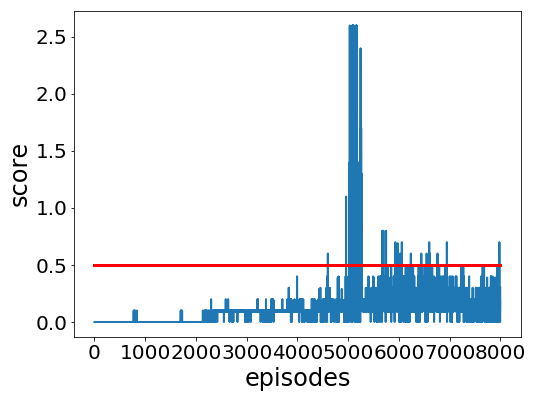

In [22]:
plt.figure(figsize = (8,6))
plt.plot(score_list,lw = 2)
plt.plot([0,8000],[0.5,0.5],c = 'r',lw = 3)
plt.xlabel('episodes',fontsize = 24)
plt.ylabel('score',fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [20]:
start = 5030
np.mean(score_list[start:start + 100])

0.6816000101715326

In [ ]:
env.close()

## 4. Use the trained agents

In [27]:
agent = Agent(state_size =24, action_size = 2, seed = 10)
agent.actor_local.load_state_dict(torch.load('checkpoint_2.pth'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    action1 = agent.act(np.array(states[0]))[0]

    action2 = agent.act(np.array(states[1]))[0]

    actions = np.hstack((action1,action2))
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 2.600000038743019


In [28]:
env.close()